### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>
(You can find the data relation diagram on iLearn - Portfolio Part 1 resources - Fig1)


 #### Q1. Remove missing data

Please remove the following records in the csv file:

 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [2]:
# your code and solutions
import pandas as pd
df = pd.read_csv('/content/The E-commerce Dataset (1).csv')
df = df.dropna(subset=['gender', 'rating', 'helpfulness']) #remove gender/rating/helpfulness
df = df[df['review'] != 'none'] # remove review is 'none'
df.to_csv('updated_file.csv', index=False)

#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


In [3]:
# Q2.1 total number
df = pd.read_csv('/content/The E-commerce Dataset (1).csv')
unique_users = df['userId'].nunique()
unique_reviews = df['review'].nunique()
unique_items = df['item'].nunique()
unique_categories = df['category'].nunique()
print("Total number of unique users:", unique_users)
print("Total number of unique reviews:", unique_reviews)
print("Total number of unique items:", unique_items)
print("Total number of unique categories:", unique_categories)
# Q 2.2 Descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
import pandas as pd
df = pd.read_csv('/content/The E-commerce Dataset (1).csv')
rating_stats = df['rating'].describe()
print("Descriptive statistics for rating records:")
print("Total number of ratings:", int(rating_stats['count']))
print("Mean rating:", rating_stats['mean'])
print("Standard deviation of ratings:", rating_stats['std'])
print("Minimum rating:", rating_stats['min'])
print("Maximum rating:", rating_stats['max'])
# Q 2.3 Descriptive statistics of the number of items rated by different genders
print("\nQ2.3 Descriptive statistics of the number of items rated by different genders:")
gender_item_count = df.groupby('gender')['item'].count()
print(gender_item_count.describe())
# Q 2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items
print("\nQ2.4 Descriptive statistics of the number of ratings received by each item:")
item_rating_count = df['item'].value_counts()
print(item_rating_count.describe())

Total number of unique users: 8580
Total number of unique reviews: 19524
Total number of unique items: 89
Total number of unique categories: 9
Descriptive statistics for rating records:
Total number of ratings: 19983
Mean rating: 3.7018465695841467
Standard deviation of ratings: 1.4046194336036537
Minimum rating: 1.0
Maximum rating: 5.0

Q2.3 Descriptive statistics of the number of items rated by different genders:
count        2.000000
mean      9986.500000
std        236.880772
min       9819.000000
25%       9902.750000
50%       9986.500000
75%      10070.250000
max      10154.000000
Name: item, dtype: float64

Q2.4 Descriptive statistics of the number of ratings received by each item:
count     89.000000
mean     224.719101
std      116.923731
min      140.000000
25%      162.000000
50%      187.000000
75%      245.000000
max      944.000000
Name: item, dtype: float64


#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

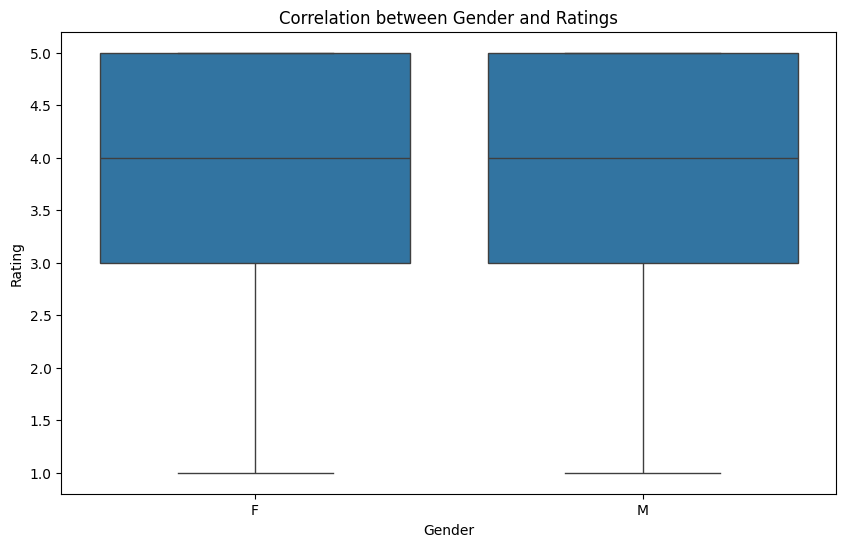

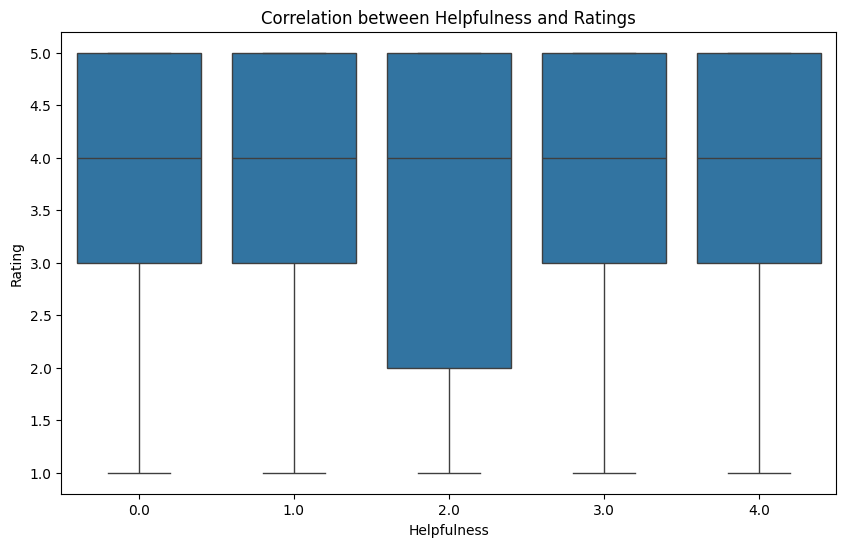

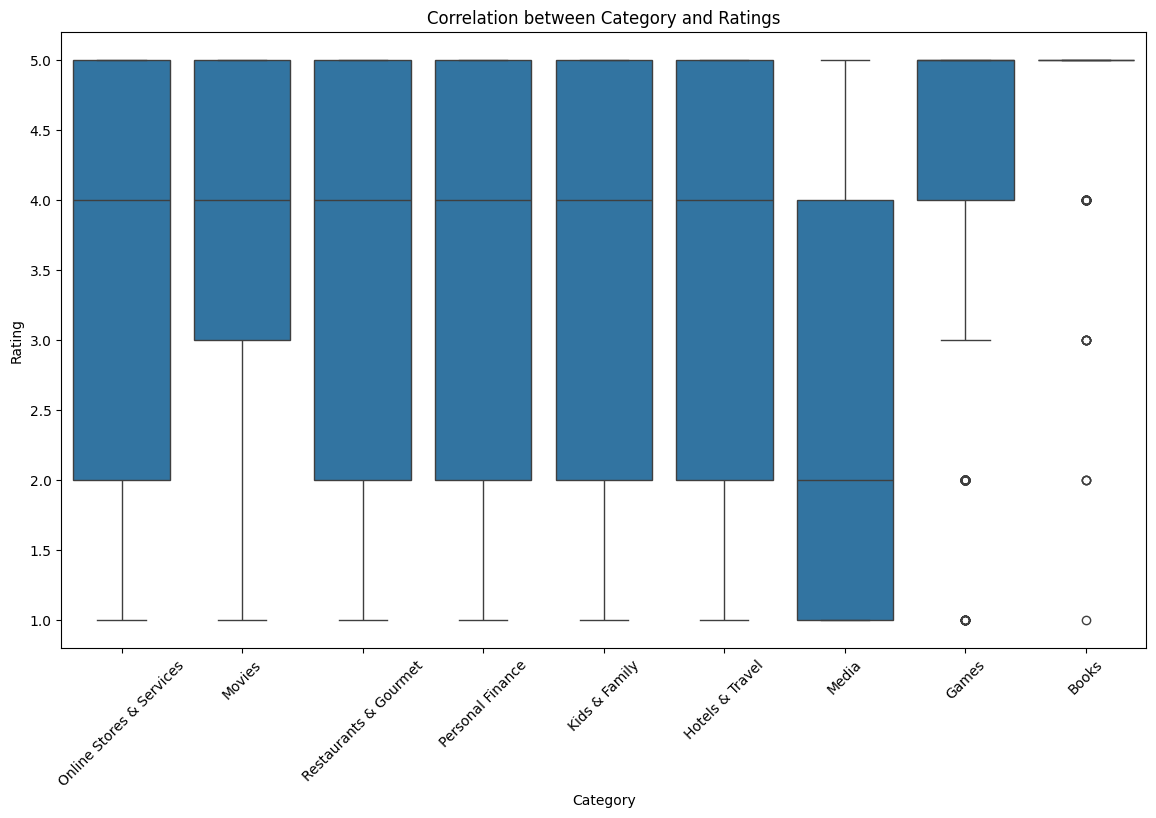

In [4]:
# your code and solutions
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the correlation between gender and ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='rating', data=df)
plt.title("Correlation between Gender and Ratings")
plt.xlabel("Gender")
plt.ylabel("Rating")
plt.show()

# Plotting the correlation between helpfulness and ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='helpfulness', y='rating', data=df)
plt.title("Correlation between Helpfulness and Ratings")
plt.xlabel("Helpfulness")
plt.ylabel("Rating")
plt.show()

# Plotting the correlation between category and ratings
plt.figure(figsize=(14, 8))
sns.boxplot(x='category', y='rating', data=df)
plt.title("Correlation between Category and Ratings")
plt.xlabel("Category")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.show()


1. Summarise the correlation between gender and ratings. This graph represent a correlation of rating (scale 1.0-5.0) and gender between two groups labeled F and M which mean Female and Male.The plot does not show a specific point between two genders as the line(median) of both boxes. Female and Male got rating 3.0-5.0 this indicated two groups have  the same level of rating that means genders are not effected to rating   
2. Summarise the correlation helpfulness and ratings. This graph provide the distribution of ratings from different level of helpfulness. The helpfulness levels appear to be on a scale, with discrete increment from 0 to 4. The ratings are concentrated approcimately the higher end of scale, which suggests that most ratings are positive, but if look at the median lines across the box plots for helpfulness levels do not demonstrate a clear increasing or decreasing trend. The median rating does not change dramaticly between different levels of helpfulness that mean helpfulness of a review does not have a strong influence on the rating  
3. Summarise the correlation category and ratings. This graph represent a correlation between category and rating. Each box plot corresponds to a different category, such as online services, movies, personal finance, kids&family etc. The line within each box indicates the median rating for that category. The height of each box shows the interquatile rang(IQR), representing the middle 50% of rating for each category. A larger box indicates greater variability in rating within category




#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

1. reviews of which the helpfulness is no more than 2
2. users who rate less than 7 items
3. items that receives less than 11 ratings

Please remove the corresponding records in the csv file that involves outlier users, reviews and items. You need to follow the order of rules to perform data cleaning operations. After that, __print the length of the data__.

In [ ]:
# Rule 1: Remove reviews of which the helpfulness is no more than 2
df = df[df['helpfulness'] > 2]
# Rule 2: Remove users who rate less than 7 items
user_rating_counts = df['userId'].value_counts()
outlier_users = user_rating_counts[user_rating_counts < 7].index
df = df[~df['userId'].isin(outlier_users)]
# Rule 3: Remove items that receive less than 11 ratings
item_rating_counts = df['item'].value_counts()
outlier_items = item_rating_counts[item_rating_counts < 11].index
df = df[~df['item'].isin(outlier_items)]
# Print the length of the data after removing outliers
print("Length of data after removing outliers:", len(df))


Length of data after removing outliers: 2697
